In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# 1. Load the datasets
iris = datasets.load_iris()

In [4]:
X = iris.data  # Features(sepal length, width, etc)
y = iris.target  # Labels

In [7]:
# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

In [10]:
model = SVC(kernel='linear', C=1.0)

In [11]:
model.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [12]:
predictions = model.predict(X_test)

In [13]:
print(f"Accuracy score: {accuracy_score(y_test, predictions)*100:.2f}%")

Accuracy score: 100.00%


# Visual Example

In [15]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

In [18]:
# 1. Load the datasets
iris = datasets.load_iris()
X = iris.data[:, :2] # sepal length, sepamn width
y = iris.target

In [19]:
# 2. Create the model
model = SVC(kernel='linear', C=1.0)
model.fit(X,y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


<Figure size 1000x600 with 0 Axes>

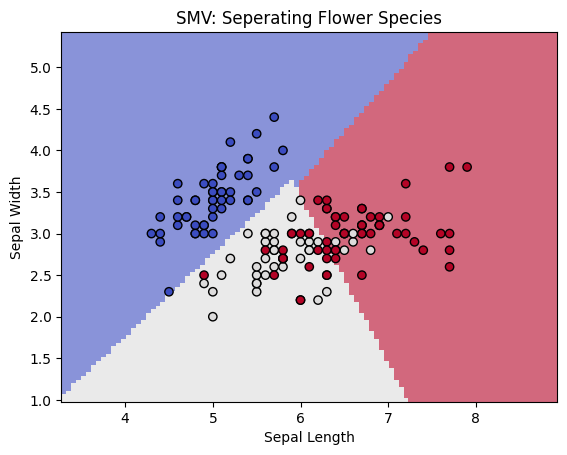

In [20]:
# 3. Visualize the Descision Boundary 
plt.figure(figsize = (10,6))
display = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method = "predict",
    cmap=plt.cm.coolwarm,
    plot_method = "pcolormesh",
    shading= "auto",
    alpha = 0.6
)

# plot the actual data points
plt.scatter(X[:,0], X[:,1], c=y, edgecolor="k", cmap=plt.cm.coolwarm)
plt.title("SMV: Seperating Flower Species")
plt.xlabel("Sepal Length")
plt.ylabel('Sepal Width')
plt.show()

# Titanic Data set

In [32]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [33]:
df = sns.load_dataset('titanic')

In [28]:
features = ['age', 'pclass']
X = df[features]
y = df['survived']

In [36]:
# Data Prepocessing
imputer = SimpleImputer(strategy = 'mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns = X.columns)
X_imputed.isnull().sum()

age       0
pclass    0
dtype: int64

In [37]:
# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed,y, test_size = 0.2, random_state= 42)

In [40]:
# 5. pipeline
scaler = StandardScaler()
model_pipeline = make_pipeline(
    scaler,
    SVC(
        kernel = 'rbf', C=1.0, gamma = 'auto', random_state = 42
    )
)

In [41]:
# 6. Train the Model
model_pipeline.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'


In [43]:
# 7. Evaluate the model
predictions = model_pipeline.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, predictions)*100:.2f}%")

Accuracy score: 74.30%


# Visualizztion

In [44]:
X_full_scaled = scaler.fit_transform(X_imputed)
y_full= y.to_numpy()

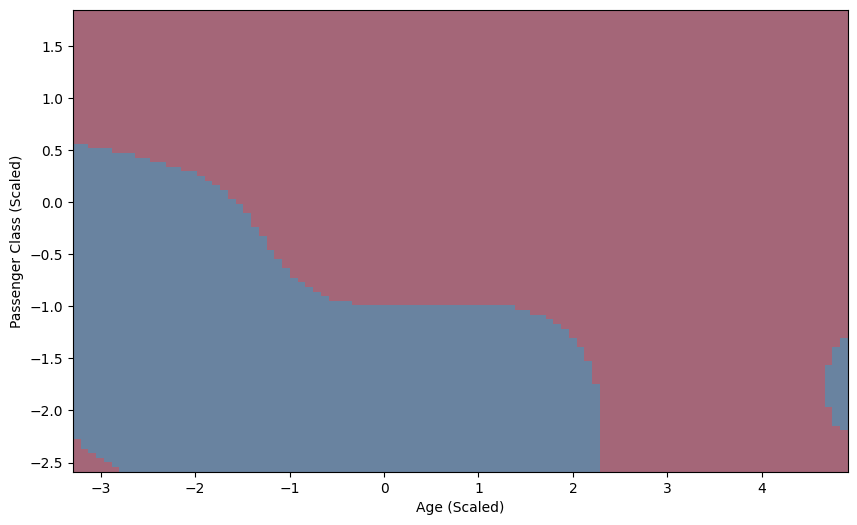

In [48]:
plt.figure(figsize = (10,6))
svc_model = model_pipeline.named_steps['svc']

display = DecisionBoundaryDisplay.from_estimator(
    svc_model,
    X_full_scaled,
    response_method = "predict",
    cmap = plt.cm.RdBu,
    plot_method = "pcolormesh",
    shading= "auto",
    alpha = 0.6,
    xlabel = "Age (Scaled)",
    ylabel = "Passenger Class (Scaled)",
    ax = plt.gca()
)
plt.show()

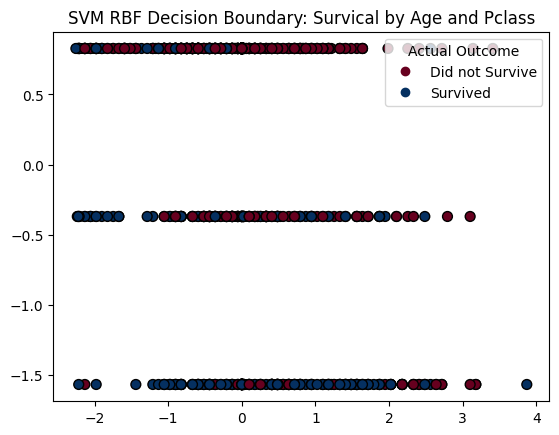

In [49]:
# 8. plot teh actual data points
scatter = plt.scatter(
    X_full_scaled[:, 0],
    X_full_scaled[:, 1],
    c = y_full,
    cmap = plt.cm.RdBu,
    edgecolor = 'k',
    marker = 'o',
    s = 50,
    label = y.name
)

handles, labels = scatter.legend_elements()

plt.legend(
    handles = handles,
    labels = ["Did not Survive", "Survived"],
    title = "Actual Outcome"
)

plt.title("SVM RBF Decision Boundary: Survical by Age and Pclass")
plt.show()